### 데이터 전처리
- 사용할 데이터: Online Retail.xlsx --> Online_Retail.csv
- 컬럼명
    - InvoiceNo: 주문 번호
    - StockCode: 품목 코드
    - Description: 품목 명
    - Quantity: 수량 (+)_구매, (-)_환불로 추측
    - InvoiceDate: 주문 일자
    - UnitPrice: 단가?
    - CustomerID: 고객ID
    - Country: 국가
- 
- 전처리 후 데이터는 CustomerID와 InvoiceDate의 월별로 Total_Price, Customer_rank
- 나중에 필요하다면.. Country도 포함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 분류모델: Decision Tree 사용 예정
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 데이터 불러오기
data_df = pd.read_csv('./data/Online_Retail.csv', encoding='utf-8')

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26,3.39,17850.0,United Kingdom


In [4]:
# 결측치 확인
data_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data_df.loc[data_df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26,10.79,NaN,United Kingdom


In [6]:
data_df['CustomerID'].fillna(0, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\226438813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['CustomerID'].fillna(0, inplace=True)


In [7]:
data_df = data_df.astype({'CustomerID':'int64'})
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [8]:
data_df['Description'].fillna('Unknown', inplace=True)
data_df.isna().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\1154956515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Description'].fillna('Unknown', inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
data_df['CustomerID'].head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: int64

In [10]:
data_df.loc[data_df.loc[data_df.duplicated()].index, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49,2.95,17920,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34,0.39,14446,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34,2.49,14446,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34,1.95,14446,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34,2.10,14446,United Kingdom


In [11]:
data_df = data_df.drop_duplicates()
data_df.duplicated().sum()

0

In [12]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  int64         
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.8+ MB


In [13]:
data_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [24]:
# 환불의 경우 C가 앞에 붙음.  또는 Quantity 값이 -나옴
drop_index = data_df[(data_df['Quantity'] <= 0)].index.to_list()
data_df = data_df.drop(index=drop_index)
data_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [25]:
# UnitPrice가 0보다 작거나 같은 경우도 버림
drop_index = data_df[(data_df['UnitPrice'] <= 0)].index.to_list()
data_df = data_df.drop(index=drop_index)
data_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.0+ MB


In [27]:
need_df = data_df[['CustomerID', 'InvoiceDate', 'Country', 'Quantity', 'UnitPrice']]
need_df.head()

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice
0,17850,2010-12-01 08:26:00,United Kingdom,6,2.55
1,17850,2010-12-01 08:26:00,United Kingdom,6,3.39
2,17850,2010-12-01 08:26:00,United Kingdom,8,2.75
3,17850,2010-12-01 08:26:00,United Kingdom,6,3.39
4,17850,2010-12-01 08:26:00,United Kingdom,6,3.39


In [28]:
need_df.to_csv('./data/online.csv', encoding='utf-8')

In [29]:
# 데이터 정제하기
test_df = need_df.set_index(['CustomerID', 'InvoiceDate'])
test_df # df의 형태를 보고 싶어서

Country  Quantity  UnitPrice
CustomerID InvoiceDate                                             
17850      2010-12-01 08:26:00  United Kingdom         6       2.55
           2010-12-01 08:26:00  United Kingdom         6       3.39
           2010-12-01 08:26:00  United Kingdom         8       2.75
           2010-12-01 08:26:00  United Kingdom         6       3.39
           2010-12-01 08:26:00  United Kingdom         6       3.39
...                                        ...       ...        ...
12680      2011-12-09 12:50:00          France        12       0.85
           2011-12-09 12:50:00          France         6       2.10
           2011-12-09 12:50:00          France         4       4.15
           2011-12-09 12:50:00          France         4       4.15
           2011-12-09 12:50:00          France         3       4.95

[524878 rows x 3 columns]

In [30]:
need_df.loc[:, 'Price'] = need_df['Quantity'] * need_df['UnitPrice'] * 1748
need_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\686852872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  need_df.loc[:, 'Price'] = need_df['Quantity'] * need_df['UnitPrice'] * 1748


,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price
0,17850,2010-12-01 08:26:00,United Kingdom,6,2.55,26744.40
1,17850,2010-12-01 08:26:00,United Kingdom,6,3.39,35554.32
2,17850,2010-12-01 08:26:00,United Kingdom,8,2.75,38456.00
3,17850,2010-12-01 08:26:00,United Kingdom,6,3.39,35554.32
4,17850,2010-12-01 08:26:00,United Kingdom,6,3.39,35554.32
...,...,...,...,...,...,...
541904,12680,2011-12-09 12:50:00,France,12,0.85,17829.60
541905,12680,2011-12-09 12:50:00,France,6,2.10,22024.80
541906,12680,2011-12-09 12:50:00,France,4,4.15,29016.80
541907,12680,2011-12-09 12:50:00,France,4,4.15,29016.80


In [31]:
need_df.loc[:, 'month'] = need_df['InvoiceDate'].dt.month
need_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\750545294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  need_df.loc[:, 'month'] = need_df['InvoiceDate'].dt.month


,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month
0,17850,2010-12-01 08:26:00,United Kingdom,6,2.55,26744.40,12
1,17850,2010-12-01 08:26:00,United Kingdom,6,3.39,35554.32,12
2,17850,2010-12-01 08:26:00,United Kingdom,8,2.75,38456.00,12
3,17850,2010-12-01 08:26:00,United Kingdom,6,3.39,35554.32,12
4,17850,2010-12-01 08:26:00,United Kingdom,6,3.39,35554.32,12
...,...,...,...,...,...,...,...
541904,12680,2011-12-09 12:50:00,France,12,0.85,17829.60,12
541905,12680,2011-12-09 12:50:00,France,6,2.10,22024.80,12
541906,12680,2011-12-09 12:50:00,France,4,4.15,29016.80,12
541907,12680,2011-12-09 12:50:00,France,4,4.15,29016.80,12


In [32]:
# need_df = need_df.astype({'month':'str'})
need_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   524878 non-null  int64         
 1   InvoiceDate  524878 non-null  datetime64[ns]
 2   Country      524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   UnitPrice    524878 non-null  float64       
 5   Price        524878 non-null  float64       
 6   month        524878 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(1)
memory usage: 30.0+ MB


In [64]:
year_2010_index = need_df[need_df['InvoiceDate'].dt.year == 2010].index.to_list()
need_df = need_df.drop(index=year_2010_index)
need_df.head(13)

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month
42481,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1
42482,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1
42483,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1
42484,13313,2011-01-04 10:00:00,United Kingdom,5,2.10,18354.0,1
42485,13313,2011-01-04 10:00:00,United Kingdom,10,1.25,21850.0,1
42486,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1
42487,13313,2011-01-04 10:00:00,United Kingdom,6,3.25,34086.0,1
42488,13313,2011-01-04 10:00:00,United Kingdom,12,1.45,30415.2,1
42489,13313,2011-01-04 10:00:00,United Kingdom,6,2.95,30939.6,1
42490,13313,2011-01-04 10:00:00,United Kingdom,8,1.95,27268.8,1


In [65]:
test_df = need_df.set_index(['CustomerID', 'month'])
test_df

InvoiceDate         Country  Quantity  UnitPrice  \
CustomerID month                                                            
13313      1     2011-01-04 10:00:00  United Kingdom        10       1.95   
           1     2011-01-04 10:00:00  United Kingdom        25       0.42   
           1     2011-01-04 10:00:00  United Kingdom        25       0.42   
           1     2011-01-04 10:00:00  United Kingdom         5       2.10   
           1     2011-01-04 10:00:00  United Kingdom        10       1.25   
...                              ...             ...       ...        ...   
12680      12    2011-12-09 12:50:00          France        12       0.85   
           12    2011-12-09 12:50:00          France         6       2.10   
           12    2011-12-09 12:50:00          France         4       4.15   
           12    2011-12-09 12:50:00          France         4       4.15   
           12    2011-12-09 12:50:00          France         3       4.95   

                    Price  
CustomerID month           
13313      1      34086.0  
           1      18354.0  
           1      18354.0  
           1      18354.0  
           1      21850.0  
...                   ...  
12680      12     17829.6  
           12     22024.8  
           12     29016.8  
           12     29016.8  
           12     25957.8  

[483887 rows x 5 columns]

In [66]:
customer_id = list(set(need_df['CustomerID']))


In [67]:
# 고객ID 별로 월을 보고 싶음.
customer_mount_list =  list(set(test_df.loc[customer_id[0]].index))


In [68]:
test_df.loc[customer_id[0], customer_mount_list[0]]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\895409629.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  test_df.loc[customer_id[0], customer_mount_list[0]]


InvoiceDate         Country  Quantity  UnitPrice  \
CustomerID month                                                            
0          1     2011-01-04 13:25:00  United Kingdom         1      16.98   
           1     2011-01-04 13:25:00  United Kingdom         1       3.36   
           1     2011-01-04 13:25:00  United Kingdom         3       0.43   
           1     2011-01-04 13:25:00  United Kingdom         5       0.81   
           1     2011-01-04 13:25:00  United Kingdom         1       1.66   
...                              ...             ...       ...        ...   
           1     2011-01-31 12:14:00  United Kingdom         2       4.96   
           1     2011-01-31 12:14:00  United Kingdom         6       0.83   
           1     2011-01-31 12:14:00  United Kingdom         3       1.63   
           1     2011-01-31 12:14:00  United Kingdom         1     157.76   
           1     2011-01-31 12:14:00  United Kingdom         3       0.83   

                      Price  
CustomerID month             
0          1       29681.04  
           1        5873.28  
           1        2254.92  
           1        7079.40  
           1        2901.68  
...                     ...  
           1       17340.16  
           1        8705.04  
           1        8547.72  
           1      275764.48  
           1        4352.52  

[13072 rows x 5 columns]

In [69]:
month_total_price = []
for customer in customer_id:
    customer_mount_list = list(set(test_df.loc[customer].index))
    for month in customer_mount_list:
        month_total = test_df.loc[customer, month]['Price'].sum()
        month_total_price.append(month_total)
month_total_price

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\2675069696.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  month_total = test_df.loc[customer, month]['Price'].sum()


[212749604.39999998,
 133653198.72,
 213489358.0,
 119902591.67999999,
 160713672.07999998,
 175675678.08,
 208209908.56,
 198905514.32,
 184842242.51999998,
 202105997.44,
 607711725.16,
 210808607.72,
 306599.2,
 715106.7999999999,
 422089.56000000006,
 106802.80000000002,
 164941.28,
 491257.9199999999,
 221331.75999999998,
 714127.9199999999,
 530273.28,
 209148.2,
 962308.9599999998,
 380871.72000000003,
 374159.39999999997,
 224181.00000000003,
 353218.36,
 233567.76,
 933064.9199999999,
 452102.7200000001,
 616012.6799999999,
 1083550.24,
 536111.6,
 546092.6799999999,
 536443.72,
 548522.4,
 539712.4800000001,
 547963.0399999999,
 787578.88,
 371974.4,
 898017.52,
 533070.08,
 2045072.5999999999,
 936665.8,
 401358.28,
 311860.68,
 531269.64,
 852849.2,
 310969.2,
 535936.7999999999,
 1205228.52,
 541705.2,
 845385.24,
 556283.5199999999,
 535412.4,
 1233423.7599999998,
 546669.52,
 153474.4,
 310270.0,
 774451.4000000001,
 292353.0,
 269803.8,
 460143.52,
 475718.19999999995,


In [289]:
# 월별 고객 price df
month_price_df = pd.DataFrame(columns=['customer_id', 'month', 'total_month_price', 'rank'])
customer_id.sort()

for customer in customer_id:
    customer_list = []
    month_list = []
    price_list = []
    
    customer_mouth_list = list(set(test_df.loc[customer].index))
    customer_mouth_list.sort()
    
    for month in customer_mouth_list:
        month_total = test_df.loc[customer, month]['Price'].sum()
        
        price_list.append(month_total)
        customer_list.append(customer)
        month_list.append(month)
    
    carry_df = pd.DataFrame(columns=['customer_id', 'month', 'total_month_price', 'rank'])
    carry_df['customer_id'] = customer_list
    carry_df['month'] = month_list
    carry_df['total_month_price'] = price_list
    month_price_df = pd.concat([month_price_df, carry_df], ignore_index=True)

month_price_df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\756324776.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  month_total = test_df.loc[customer, month]['Price'].sum()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\756324776.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  month_price_df = pd.concat([month_price_df, carry_df], ignore_index=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\756324776.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  month_total = test_df.loc[customer, month]['Price'].sum()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\756324776.py:14: PerformanceWarning: indexing past lexsort depth ma

,customer_id,month,total_month_price,rank
0,0,1,2.127496e+08,NaN
1,0,2,1.336532e+08,NaN
2,0,3,2.134894e+08,NaN
3,0,4,1.199026e+08,NaN
4,0,5,1.607137e+08,NaN
...,...,...,...,...
12176,18283,10,1.975065e+05,NaN
12177,18283,11,1.114717e+06,NaN
12178,18283,12,3.635840e+05,NaN
12179,18287,5,1.337709e+06,NaN


In [290]:
month_price_df['total_month_price'].min(), month_price_df['total_month_price'].max()

(1485.8, 607711725.16)

In [291]:
month_price_df
# month_price_df['customerID'] = month_price_df['customerID'].replace(0, 'non_member')

,customer_id,month,total_month_price,rank
0,0,1,2.127496e+08,NaN
1,0,2,1.336532e+08,NaN
2,0,3,2.134894e+08,NaN
3,0,4,1.199026e+08,NaN
4,0,5,1.607137e+08,NaN
...,...,...,...,...
12176,18283,10,1.975065e+05,NaN
12177,18283,11,1.114717e+06,NaN
12178,18283,12,3.635840e+05,NaN
12179,18287,5,1.337709e+06,NaN


In [292]:
month_price_df['total_month_price'].describe()

count    1.218100e+04
mean     1.409286e+06
std      8.965653e+06
min      1.485800e+03
25%      3.598083e+05
50%      6.028852e+05
75%      1.074618e+06
max      6.077117e+08
Name: total_month_price, dtype: float64

In [293]:
month_price_df['customer_id'] = month_price_df['customer_id'].replace(0, 'non_member')
month_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        12181 non-null  object 
 1   month              12181 non-null  object 
 2   total_month_price  12181 non-null  float64
 3   rank               0 non-null      object 
dtypes: float64(1), object(3)
memory usage: 380.8+ KB


In [294]:
# 고객 총 주문 금액에 따른 고객 등급
# 30 만원 마만: Sliver
# 30 만원 이상: Gold
# 60 만원 이상: Platinum
# 100 만원 이상: Vip
# 300 만원 이상: SVip

for i in range(len(month_price_df.index)):
    price = month_price_df.loc[i, 'total_month_price']

    if 300000 <= price < 600000:
        rank = 'Gold'
    elif 600000 <= price < 1000000:
        rank = 'Platinum'
    elif 1000000 <= price < 3000000:
        rank = 'Vip'
    elif 3000000 <= price:
        rank = 'SVip'
    else:
        rank = 'Silver'
        
    month_price_df.loc[i, 'rank'] = rank

month_price_df.head()

,customer_id,month,total_month_price,rank
0,non_member,1,2.127496e+08,SVip
1,non_member,2,1.336532e+08,SVip
2,non_member,3,2.134894e+08,SVip
3,non_member,4,1.199026e+08,SVip
4,non_member,5,1.607137e+08,SVip


In [295]:
month_price_df.tail(10)

,customer_id,month,total_month_price,rank
12171,18283,4,202068.80,Silver
12172,18283,5,148964.56,Silver
12173,18283,6,518316.96,Gold
12174,18283,7,244527.72,Silver
12175,18283,9,235805.20,Silver
12176,18283,10,197506.52,Silver
12177,18283,11,1114717.08,Vip
12178,18283,12,363584.00,Gold
12179,18287,5,1337709.44,Vip
12180,18287,10,1873856.00,Vip


In [296]:
month_price_df = month_price_df.astype({'total_month_price':'int64'})
month_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        12181 non-null  object
 1   month              12181 non-null  object
 2   total_month_price  12181 non-null  int64 
 3   rank               12181 non-null  object
dtypes: int64(1), object(3)
memory usage: 380.8+ KB


In [297]:
month_price_df.tail(10)

,customer_id,month,total_month_price,rank
12171,18283,4,202068,Silver
12172,18283,5,148964,Silver
12173,18283,6,518316,Gold
12174,18283,7,244527,Silver
12175,18283,9,235805,Silver
12176,18283,10,197506,Silver
12177,18283,11,1114717,Vip
12178,18283,12,363584,Gold
12179,18287,5,1337709,Vip
12180,18287,10,1873856,Vip


In [298]:
month_price_df.head(13)

,customer_id,month,total_month_price,rank
0,non_member,1,212749604,SVip
1,non_member,2,133653198,SVip
2,non_member,3,213489358,SVip
3,non_member,4,119902591,SVip
4,non_member,5,160713672,SVip
5,non_member,6,175675678,SVip
6,non_member,7,208209908,SVip
7,non_member,8,198905514,SVip
8,non_member,9,184842242,SVip
9,non_member,10,202105997,SVip


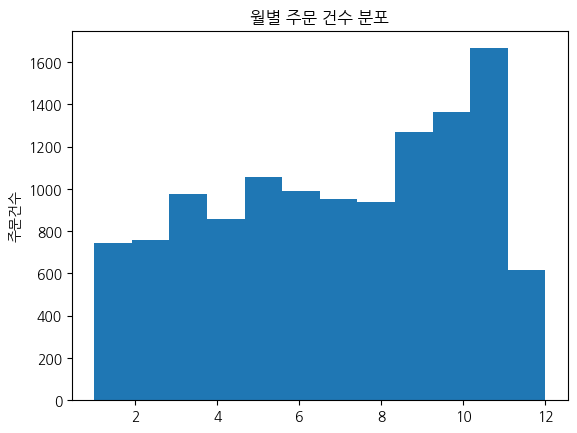

In [299]:
customer_list =list(set(month_price_df['customer_id']))

plt.hist(month_price_df['month'], bins=12)
plt.title('월별 주문 건수 분포')
plt.ylabel('주문건수')

plt.show()

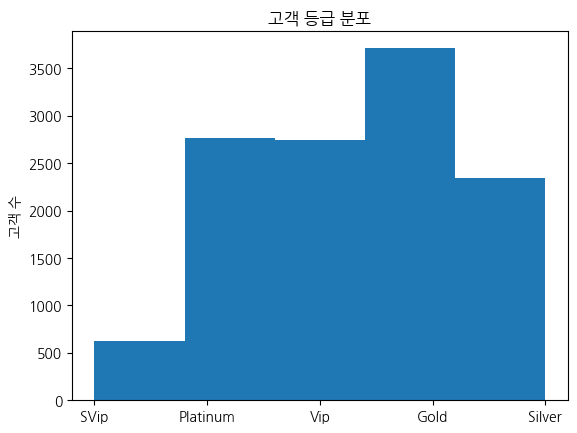

In [300]:
plt.hist(month_price_df['rank'], bins=5)
plt.title('고객 등급 분포')
plt.ylabel('고객 수')

plt.show()

In [301]:
# customer_list.sort()
len(customer_list)

4220

In [302]:
month_price_df.loc[(month_price_df['customer_id'] == customer_list[900])]

,customer_id,month,total_month_price,rank
10950,17669,4,1733142,Vip
10951,17669,5,1082886,Vip
10952,17669,6,793102,Platinum
10953,17669,8,644138,Platinum
10954,17669,9,1331102,Vip
10955,17669,10,370576,Gold


In [303]:
month_price_df.to_csv('./data/month_price_df.csv', encoding='utf-8', index=False)

In [304]:
# 고객 총 주문 금액에 따른 고객 등급
# 30 만원 마만: Sliver --> 0
# 30 만원 이상: Gold --> 1
# 60 만원 이상: Platinum --> 2
# 100 만원 이상: Vip --> 3
# 300 만원 이상: SVip --> 4

month_price_df['rank_code'] = ''

for i in range(len(month_price_df.index)):
    price = month_price_df.loc[i, 'total_month_price']

    if 300000 <= price < 600000:
        rank = 1
    elif 600000 <= price < 1000000:
        rank = 2
    elif 1000000 <= price < 3000000:
        rank = 3
    elif 3000000 <= price:
        rank = 4
    else:
        rank = 0
        
    month_price_df.loc[i, 'rank_code'] = rank

month_price_df.head()

,customer_id,month,total_month_price,rank,rank_code
0,non_member,1,212749604,SVip,4
1,non_member,2,133653198,SVip,4
2,non_member,3,213489358,SVip,4
3,non_member,4,119902591,SVip,4
4,non_member,5,160713672,SVip,4


In [305]:
month_price_df = month_price_df.astype({'month':'int64'})
month_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        12181 non-null  object
 1   month              12181 non-null  int64 
 2   total_month_price  12181 non-null  int64 
 3   rank               12181 non-null  object
 4   rank_code          12181 non-null  object
dtypes: int64(2), object(3)
memory usage: 475.9+ KB


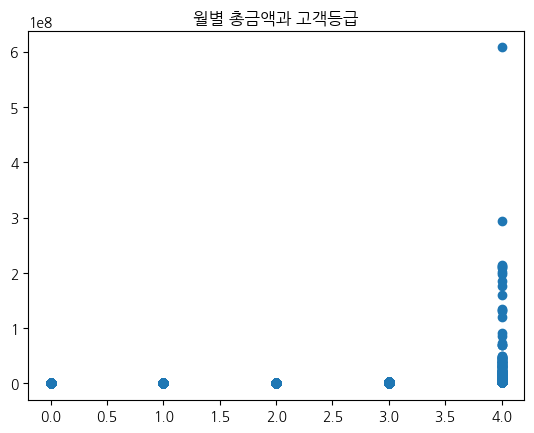

In [306]:
x_range = month_price_df['rank_code'].to_list()
y_range = month_price_df['total_month_price'].to_list()

plt.scatter(x_range, y_range)
plt.title('월별 총금액과 고객등급')

plt.show()

In [307]:
need_df.loc[:, 'day'] = need_df['InvoiceDate'].dt.day
need_df

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month,day
42481,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1,4
42482,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4
42483,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4
42484,13313,2011-01-04 10:00:00,United Kingdom,5,2.10,18354.0,1,4
42485,13313,2011-01-04 10:00:00,United Kingdom,10,1.25,21850.0,1,4
...,...,...,...,...,...,...,...,...
541904,12680,2011-12-09 12:50:00,France,12,0.85,17829.6,12,9
541905,12680,2011-12-09 12:50:00,France,6,2.10,22024.8,12,9
541906,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9
541907,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9


In [308]:
other_df = need_df.set_index(['CustomerID', 'month', 'day'])
other_df

InvoiceDate         Country  Quantity  UnitPrice  \
CustomerID month day                                                            
13313      1     4   2011-01-04 10:00:00  United Kingdom        10       1.95   
                 4   2011-01-04 10:00:00  United Kingdom        25       0.42   
                 4   2011-01-04 10:00:00  United Kingdom        25       0.42   
                 4   2011-01-04 10:00:00  United Kingdom         5       2.10   
                 4   2011-01-04 10:00:00  United Kingdom        10       1.25   
...                                  ...             ...       ...        ...   
12680      12    9   2011-12-09 12:50:00          France        12       0.85   
                 9   2011-12-09 12:50:00          France         6       2.10   
                 9   2011-12-09 12:50:00          France         4       4.15   
                 9   2011-12-09 12:50:00          France         4       4.15   
                 9   2011-12-09 12:50:00          France         3       4.95   

                        Price  
CustomerID month day           
13313      1     4    34086.0  
                 4    18354.0  
                 4    18354.0  
                 4    18354.0  
                 4    21850.0  
...                       ...  
12680      12    9    17829.6  
                 9    22024.8  
                 9    29016.8  
                 9    29016.8  
                 9    25957.8  

[483887 rows x 5 columns]

- 일단은 젤 처음에 생각했던 DTC를 사용해서 예측 분류를 하고 그 예측이 정규분포를 따르는지 확인
- 처음에 그렸던 히스토그램을 다시 그리기. 뭔가 안맞음.

In [309]:
month_price_df.head(10)

,customer_id,month,total_month_price,rank,rank_code
0,non_member,1,212749604,SVip,4
1,non_member,2,133653198,SVip,4
2,non_member,3,213489358,SVip,4
3,non_member,4,119902591,SVip,4
4,non_member,5,160713672,SVip,4
5,non_member,6,175675678,SVip,4
6,non_member,7,208209908,SVip,4
7,non_member,8,198905514,SVip,4
8,non_member,9,184842242,SVip,4
9,non_member,10,202105997,SVip,4


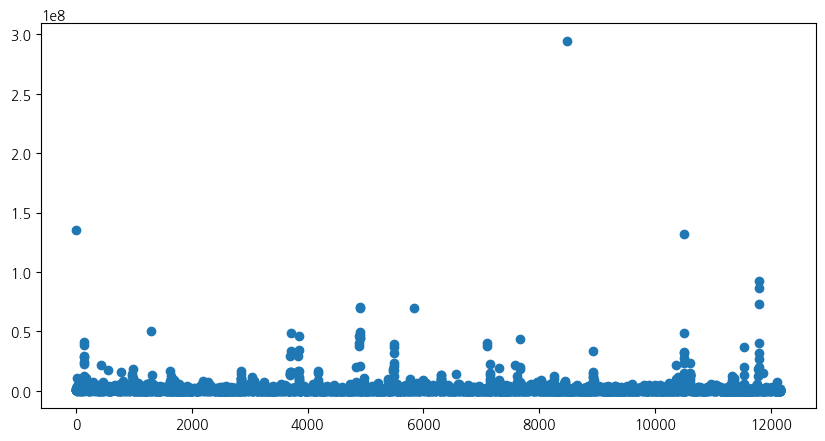

In [310]:
x_range = np.arange(len(month_price_df.loc[12:, :].index))
y_range = month_price_df.loc[12:, 'total_month_price'].to_list()

plt.figure(figsize=(10, 5))
plt.scatter(x_range, y_range)
plt.show()

In [311]:
# 하... 다시 바꿔야 하네
month_price_df['customer_id'] = month_price_df['customer_id'].replace('non_member', 0)
month_price_df = month_price_df.astype({'customer_id':'int64'})
month_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        12181 non-null  int64 
 1   month              12181 non-null  int64 
 2   total_month_price  12181 non-null  int64 
 3   rank               12181 non-null  object
 4   rank_code          12181 non-null  object
dtypes: int64(3), object(2)
memory usage: 475.9+ KB


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\2487777348.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  month_price_df['customer_id'] = month_price_df['customer_id'].replace('non_member', 0)


In [312]:
# train set과 test set으로 데이터 나누기
# 사용할 데이터 셋: month_price_df

# train 나눠주는 메서드가 있었던거 같은데...
# 의사 결정 나무만 import 했네
# 총 개수: 12181, 70%: 8526.7 --> 8527, test:3654

month_price_df['id'] = range(len(month_price_df))
month_price_df = month_price_df[['id', 'customer_id', 'month', 'total_month_price', 'rank',	'rank_code']]
month_price_df.tail(10)


,id,customer_id,month,total_month_price,rank,rank_code
12171,12171,18283,4,202068,Silver,0
12172,12172,18283,5,148964,Silver,0
12173,12173,18283,6,518316,Gold,1
12174,12174,18283,7,244527,Silver,0
12175,12175,18283,9,235805,Silver,0
12176,12176,18283,10,197506,Silver,0
12177,12177,18283,11,1114717,Vip,3
12178,12178,18283,12,363584,Gold,1
12179,12179,18287,5,1337709,Vip,3
12180,12180,18287,10,1873856,Vip,3


In [330]:
# train과 test로 나누기
train_data = month_price_df.sample(8527, replace=False, random_state=6).reset_index().drop(['index'], axis=1)
test_data = month_price_df.loc[~month_price_df['id'].isin(train_data['id'])]
test_data = test_data.reset_index().drop(['index'], axis=1)

test_data

,id,customer_id,month,total_month_price,rank,rank_code,normalize
0,9,0,10,202105997,SVip,4,22.385063
1,13,12347,1,830981,Platinum,2,-0.064502
2,17,12347,10,2262471,Vip,3,0.095162
3,19,12348,1,397565,Gold,1,-0.112844
4,21,12348,9,541880,Gold,1,-0.096748
...,...,...,...,...,...,...,...
3649,12169,18283,1,373635,Gold,1,-0.115513
3650,12170,18283,2,176460,Silver,0,-0.137505
3651,12171,18283,4,202068,Silver,0,-0.134649
3652,12173,18283,6,518316,Gold,1,-0.099376


In [314]:
train_data

,id,customer_id,month,total_month_price,rank,rank_code
0,5615,14997,9,486643,Gold,1
1,847,12695,10,285098,Silver,0
2,5680,15031,3,263650,Silver,0
3,12084,18231,5,1152840,Vip,3
4,7691,16033,6,1094964,Vip,3
...,...,...,...,...,...,...
8522,6699,15535,4,207749,Silver,0
8523,9425,16902,8,2983626,Vip,3
8524,11712,18061,5,278788,Silver,0
8525,652,12621,10,1102201,Vip,3


In [331]:
# DTC 학습하고 분류하기

# 객체 선언
dtc = DecisionTreeClassifier(min_samples_split=5)  # min_sample_split: 최종 노드의 샘플수

x_train = train_data[['total_month_price']]
y_train = train_data['rank']

# 모델 학습
dtc.fit(x_train, y_train)

# 모델 적용
prediction = dtc.predict(test_data[['total_month_price']])
test_data['pred'] = prediction

In [332]:
score = (pd.Series(prediction) == test_data['rank']).mean()
score

0.9997263273125342

In [317]:
# 등급분포 히스토그램 그려주는 함수
def drow_rank_bar(data, count_thing, title):
    
    x_data = ['Silver', 'Gold', 'Platinum', 'Vip', 'SVip']
    y_data = [] # rank count
    
    for i in range(len(x_data)):
        carry = (data[count_thing] == x_data[i]).sum()
        y_data.append(carry)
    
    
    bars = plt.bar(x_data, y_data)
    
    # bar에 값을 추가하기
    for bar in bars:
        y_val = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, y_val, f'{y_val:.0f}', va='bottom', ha='center')
    
    plt.title(title)
    plt.xlabel('고객 등급')
    plt.ylabel('고객수 (명)')
    plt.savefig('./data/'+title+'.png')
    
    plt.show()

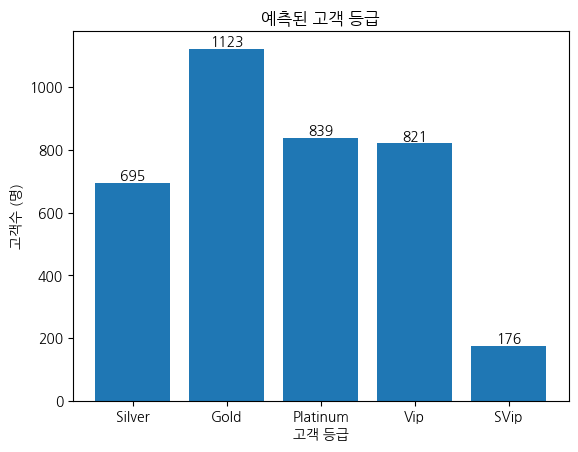

In [318]:
title = '예측된 고객 등급'
drow_rank_bar(test_data, 'pred', title)

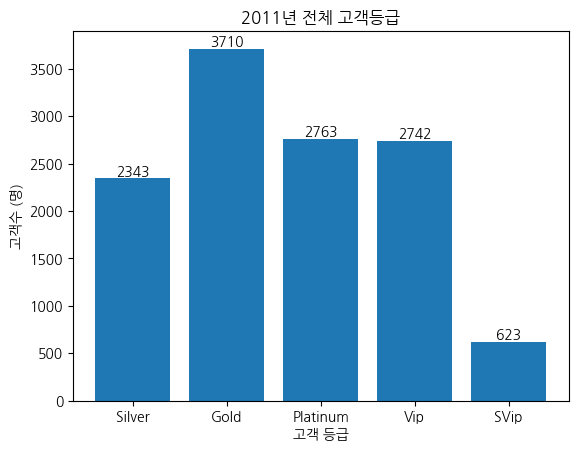

In [319]:
title = '2011년 전체 고객등급'
drow_rank_bar(month_price_df, 'rank', title)

In [320]:
idx_list = test_data.loc[test_data['month'] == 1].index.to_list()
(test_data.loc[idx_list, 'pred'] == 'Silver').sum()

47

In [321]:
# 등급분포 히스토그램 그리는 함수

def draw_month_rank_bar(data, count_thing, title):
    label_list = ['Silver', 'Gold', 'Platinum', 'Vip', 'SVip']
    x_data = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
    
    # 각 등급에 대한 월별 카운트를 저장할 리스트 초기화
    y_data_list = {label: [] for label in label_list}
    
    for month in range(1, 13):  # 월은 1부터 12까지
        mask_idx = data[data['month'] == month].index
        for rank in label_list:
            count = (data.loc[mask_idx, count_thing] == rank).sum()
            y_data_list[rank].append(count)
    
    width = 0.15  # 막대 너비
    x = np.arange(len(x_data))  # x축 좌표
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for i, rank in enumerate(label_list):
        offset = width * i
        bars = ax.bar(x + offset, y_data_list[rank], width, label=rank)
        
        # bar에 값을 추가하기
        for bar in bars:
            y_val = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, y_val, f'{y_val:.0f}', va='bottom', ha='center')
    
    ax.set_title(title)
    # ax.set_xlabel('월')
    ax.set_ylabel('고객수 (명)')
    ax.set_xticks(x + width * 2)  # x축 위치 조정
    ax.set_xticklabels(x_data)
    ax.legend(loc='upper left', ncol=5)
    
    plt.savefig('./data/' + title + '.png')
    plt.show()



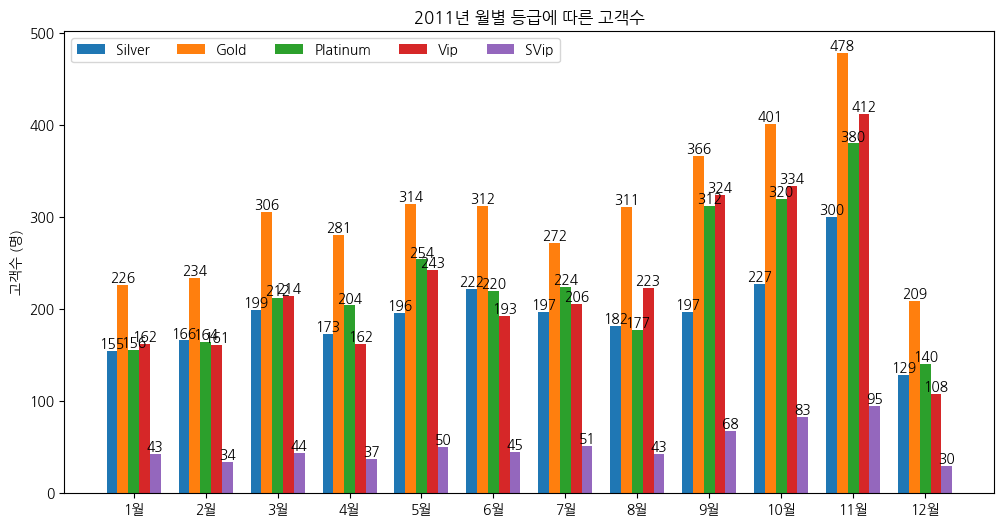

In [322]:
title = '2011년 월별 등급에 따른 고객수'
draw_month_rank_bar(month_price_df, 'rank', title)

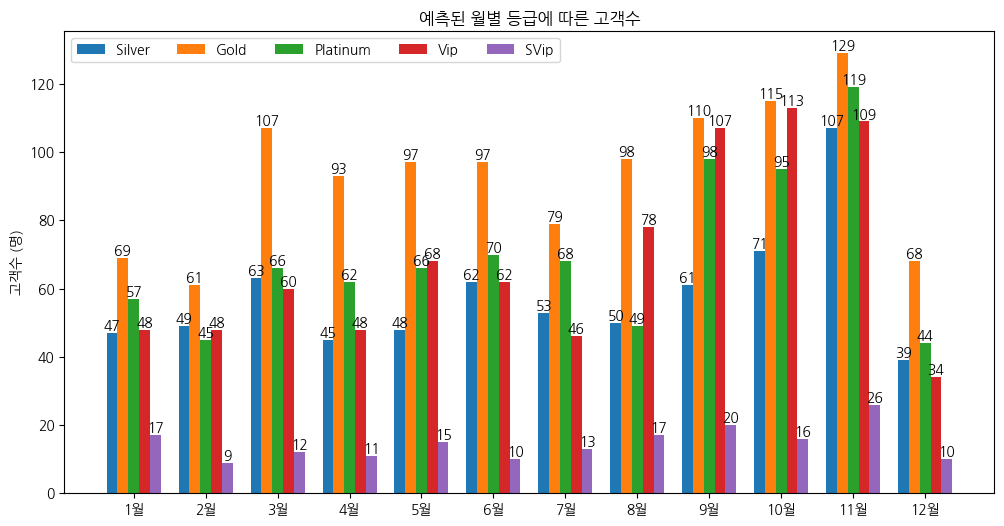

In [323]:
title = '예측된 월별 등급에 따른 고객수'
draw_month_rank_bar(test_data, 'pred', title)

In [359]:
# 월별로 정규화 시키는 함수
def apply_monthly_z_normalization(data, column):
    normalized_column = column + '_monthly_normalized'
    data[normalized_column] = 0  # 초기화
    
    for month in range(1, 13):
        mask = data['month'] == month
        monthly_mean = data.loc[mask, column].mean()
        monthly_std = data.loc[mask, column].std()
        
        # 월별 Z 정규화 적용
        data.loc[mask, normalized_column] = (data.loc[mask, column] - monthly_mean) / monthly_std
    
    return data

In [360]:
month_price_df['normalize'] = month_price_df['total_month_price']
apply_monthly_z_normalization(month_price_df, 'normalize')


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25320\2328962639.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2.18533136e+01  1.37969232e+01 -8.21938274e-02 -1.27056330e-01
  2.42805102e-01 -6.91466080e-02 -5.48348178e-02 -5.03910683e-02
 -1.42334378e-01 -9.01711707e-02 -5.25006874e-02 -1.27389319e-01
 -8.14953479e-02  1.11515274e+00 -1.09686674e-01 -1.39719945e-01
 -1.25055189e-01 -9.86063349e-02 -9.71552407e-02  3.60030407e-01
 -1.28295748e-01 -3.18833295e-02 -1.88723382e-02 -5.96838054e-02
 -6.87703523e-02 -2.05206173e-02 -5.90885245e-02 -6.91358430e-02
  3.78160803e-02 -1.07607797e-01 -1.18412751e-02 -1.05796595e-01
  2.24308231e-01 -4.49829245e-02 -1.49580844e-01 -1.07162708e-01
 -1.44230665e-01 -7.89116571e-02 -9.81141491e-02  4.52702939e-01
  3.93557783e-02 -4.14981869e-02  4.50064906e-01 -8.02541702e-02
 -1.28682976e-01  1.22853159e-01 -3.60972887e-02 -8.62720862e-02
 -1.0650946

,id,customer_id,month,total_month_price,rank,rank_code,normalize,predicted_rank_code,normallize_monthly_normalized,normalize_monthly_normalized
0,0,0,1,212749604,SVip,4,212749604,7.037714,0,21.853314
1,1,0,2,133653198,SVip,4,133653198,5.016859,0,25.025727
2,2,0,3,213489358,SVip,4,213489358,7.056614,0,29.532713
3,3,0,4,119902591,SVip,4,119902591,4.665541,0,26.703715
4,4,0,5,160713672,SVip,4,160713672,5.708234,0,28.727102
...,...,...,...,...,...,...,...,...,...,...
12176,12176,18283,10,197506,Silver,0,197506,1.607165,0,-0.188373
12177,12177,18283,11,1114717,Vip,3,1114717,1.630599,0,-0.030643
12178,12178,18283,12,363584,Gold,1,363584,1.611408,0,-0.098677
12179,12179,18287,5,1337709,Vip,3,1337709,1.636296,0,0.011800


In [324]:
# 등급분포 히스토그램 그리는 함수

def draw_month_rank_nomal_bar(data, count_thing, title, normalize_column):
    label_list = ['Silver', 'Gold', 'Platinum', 'Vip', 'SVip']
    x_data = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
    mean_liat = []  # 정규화 할 리스트
    
    data[normalize_column] = (data[normalize_column] - data[normalize_column].mean()) / data[normalize_column].std()
    
    
    # 각 등급에 대한 월별 카운트를 저장할 리스트 초기화
    y_data_list = {label: [] for label in label_list}
    
    for month in range(1, 13):  # 월은 1부터 12까지
        mask_idx = data[data['month'] == month].index
        for rank in label_list:
            rank_data = data[(data['month'] == month) & (data[count_thing] == rank)]
            total = rank_data[normalize_column].sum()
            y_data_list[rank].append(total)
    
    width = 0.15  # 막대 너비
    x = np.arange(len(x_data))  # x축 좌표
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for i, rank in enumerate(label_list):
        offset = width * i
        bars = ax.bar(x + offset, y_data_list[rank], width, label=rank)
        
        # bar에 값을 추가하기
        for bar in bars:
            y_val = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, y_val, f'{y_val:.0f}', va='bottom', ha='center')
    
    ax.set_title(title)
    # ax.set_xlabel('월')
    ax.set_ylabel('고객수 (명)')
    ax.set_xticks(x + width * 2)  # x축 위치 조정
    ax.set_xticklabels(x_data)
    ax.legend(loc='upper left', ncol=5)
    
    plt.savefig('./data/' + title + '.png')
    plt.show()



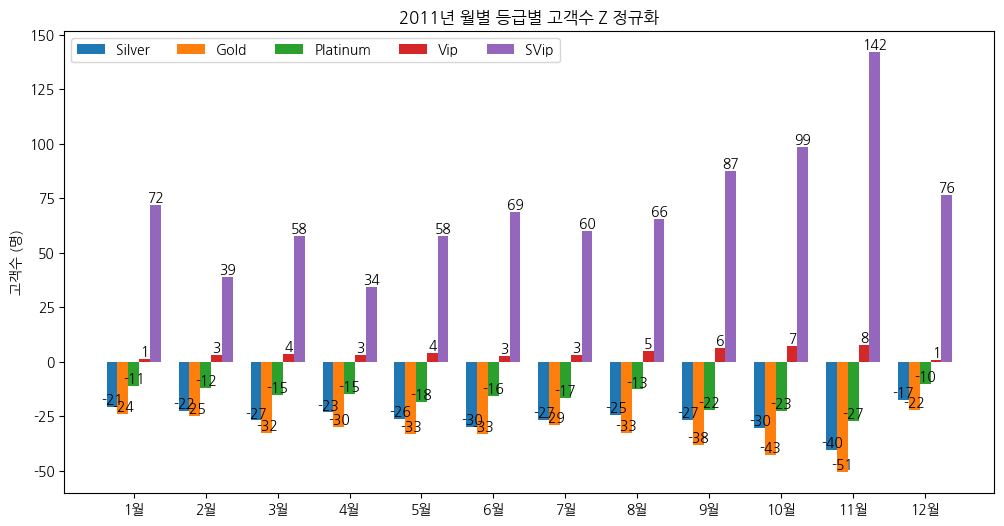

In [325]:
title = '2011년 월별 등급별 고객수 Z 정규화'
month_price_df['normalize'] = month_price_df['total_month_price']
draw_month_rank_nomal_bar(month_price_df, 'rank', title, 'normalize')

In [326]:
month_price_df

,id,customer_id,month,total_month_price,rank,rank_code,normalize
0,0,0,1,212749604,SVip,4,23.572217
1,1,0,2,133653198,SVip,4,14.750059
2,2,0,3,213489358,SVip,4,23.654727
3,3,0,4,119902591,SVip,4,13.216361
4,4,0,5,160713672,SVip,4,17.768297
...,...,...,...,...,...,...,...
12176,12176,18283,10,197506,Silver,0,-0.135158
12177,12177,18283,11,1114717,Vip,3,-0.032855
12178,12178,18283,12,363584,Gold,1,-0.116634
12179,12179,18287,5,1337709,Vip,3,-0.007983


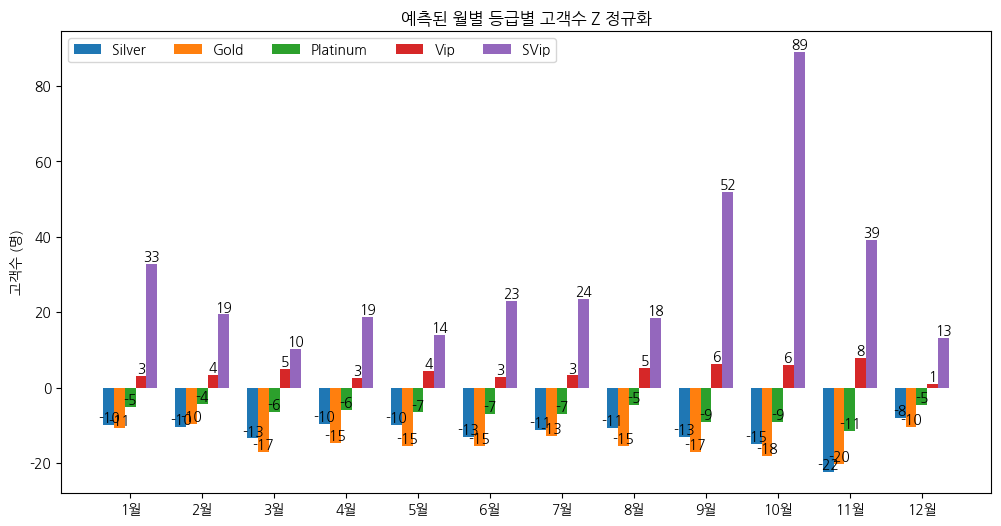

In [333]:
title = '예측된 월별 등급별 고객수 Z 정규화'
test_data['normalize'] = test_data['total_month_price']
draw_month_rank_nomal_bar(test_data, 'pred', title, 'normalize')

In [328]:
test_data

,id,customer_id,month,total_month_price,rank,rank_code,pred,normalize
0,9,0,10,202105997,SVip,4,SVip,40.381420
1,13,12347,1,830981,Platinum,2,Platinum,-0.083757
2,17,12347,10,2262471,Vip,3,Vip,0.204035
3,19,12348,1,397565,Gold,1,Gold,-0.170893
4,21,12348,9,541880,Gold,1,Gold,-0.141879
...,...,...,...,...,...,...,...,...
3649,12169,18283,1,373635,Gold,1,Gold,-0.175704
3650,12170,18283,2,176460,Silver,0,Silver,-0.215345
3651,12171,18283,4,202068,Silver,0,Silver,-0.210197
3652,12173,18283,6,518316,Gold,1,Gold,-0.146617


In [334]:
rank_mapping = {'Silver': 0, 'Gold': 1, 'Platinum': 2, 'Vip': 3, 'SVip': 4}
test_data['pred_code'] = test_data['rank'].map(rank_mapping)
test_data

,id,customer_id,month,total_month_price,rank,rank_code,normalize,pred,pred_code
0,9,0,10,202105997,SVip,4,40.381420,SVip,4
1,13,12347,1,830981,Platinum,2,-0.083757,Platinum,2
2,17,12347,10,2262471,Vip,3,0.204035,Vip,3
3,19,12348,1,397565,Gold,1,-0.170893,Gold,1
4,21,12348,9,541880,Gold,1,-0.141879,Gold,1
...,...,...,...,...,...,...,...,...,...
3649,12169,18283,1,373635,Gold,1,-0.175704,Gold,1
3650,12170,18283,2,176460,Silver,0,-0.215345,Silver,0
3651,12171,18283,4,202068,Silver,0,-0.210197,Silver,0
3652,12173,18283,6,518316,Gold,1,-0.146617,Gold,1


In [335]:
from sklearn.linear_model import LinearRegression

In [345]:
# 선형회귀 분석해서 그림그려주는 함수
def line_reg_draw(data, things, title):
    # 회귀모델 초기화 및 학습
    X = data[['normalize']]  # 독립 변수
    y = data[things]  # 종속 변수

    model = LinearRegression()
    model.fit(X, y)

    # 회귀 결과 예측
    data['predicted_rank_code'] = model.predict(X)
    
    plt.figure(figsize=(10, 6))

    # 실제 등급과 예측된 등급의 관계 시각화
    plt.scatter(data['normalize'], data[things], color='blue', label='Actual Rank')
    plt.plot(data['normalize'], data['predicted_rank_code'], color='red', label='Predicted Rank')

    plt.title(title+'Z 정규화된 가격과 고객 등급 간의 회귀분석')
    plt.xlabel('Normalized Total Month Price')
    plt.ylabel('Rank Code')
    plt.ylim(-1, 5)
    plt.legend()
    
    plt.show()

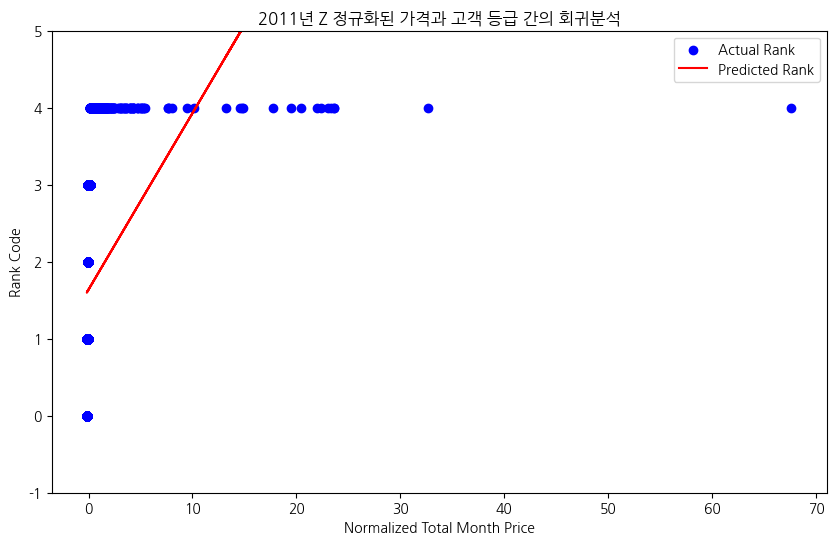

In [346]:
title = '2011년 '
line_reg_draw(month_price_df, 'rank_code', title)

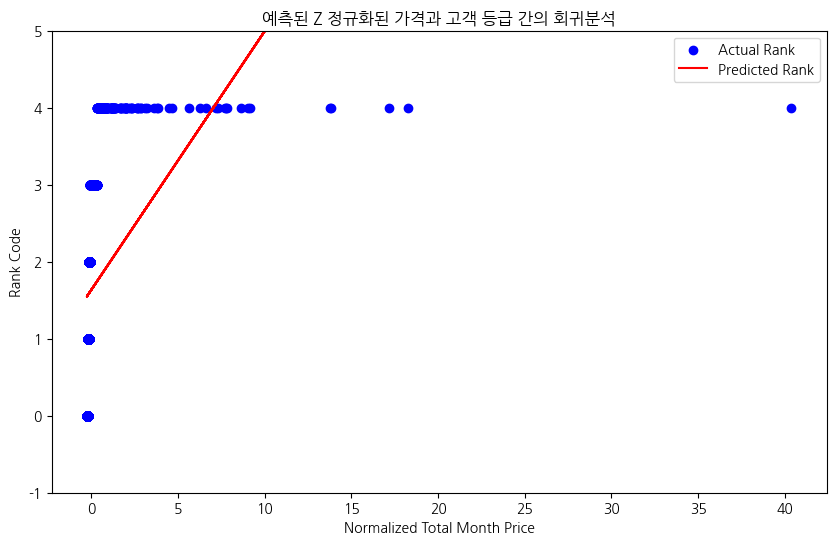

In [347]:
title = '예측된 '
line_reg_draw(test_data, 'pred_code', title)

In [361]:
need_df

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month,day
42481,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1,4
42482,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4
42483,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4
42484,13313,2011-01-04 10:00:00,United Kingdom,5,2.10,18354.0,1,4
42485,13313,2011-01-04 10:00:00,United Kingdom,10,1.25,21850.0,1,4
...,...,...,...,...,...,...,...,...
541904,12680,2011-12-09 12:50:00,France,12,0.85,17829.6,12,9
541905,12680,2011-12-09 12:50:00,France,6,2.10,22024.8,12,9
541906,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9
541907,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9


In [365]:
need_df.reset_index().drop(['index'], axis=1)

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month,day
0,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1,4
1,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4
2,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4
3,13313,2011-01-04 10:00:00,United Kingdom,5,2.10,18354.0,1,4
4,13313,2011-01-04 10:00:00,United Kingdom,10,1.25,21850.0,1,4
...,...,...,...,...,...,...,...,...
483882,12680,2011-12-09 12:50:00,France,12,0.85,17829.6,12,9
483883,12680,2011-12-09 12:50:00,France,6,2.10,22024.8,12,9
483884,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9
483885,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9


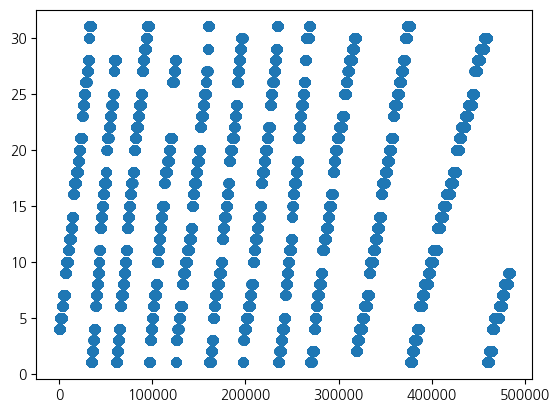

In [374]:
x_range = range(len(need_df.index.to_list()))
y_range = need_df['day'].to_list()

plt.scatter(x_range, y_range)
plt.show()

In [375]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [376]:
# 사용할 변수 선택
features = need_df[['Quantity', 'UnitPrice', 'Price']]

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

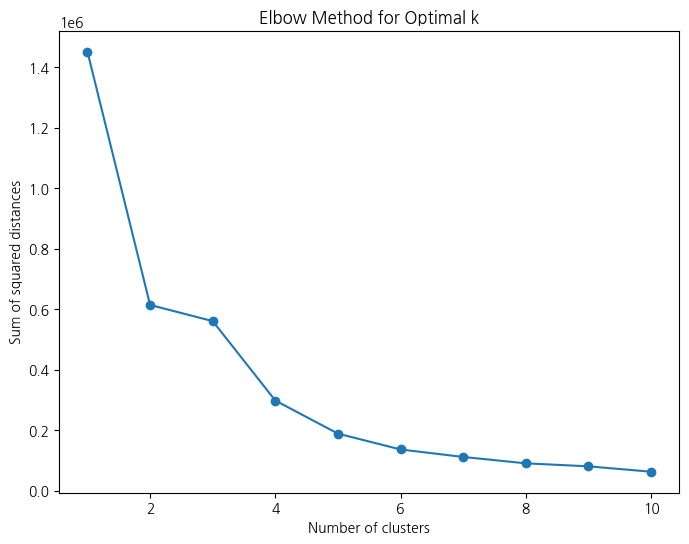

In [377]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [378]:
# K-means 군집화 수행
optimal_k = 4  # 엘보우 방법을 통해 선택한 최적의 k값
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
need_df['cluster'] = kmeans.fit_predict(scaled_features)

# 각 클러스터에 속한 데이터의 개수 확인
print(need_df['cluster'].value_counts())

cluster
0    483850
3        35
2         1
1         1
Name: count, dtype: int64


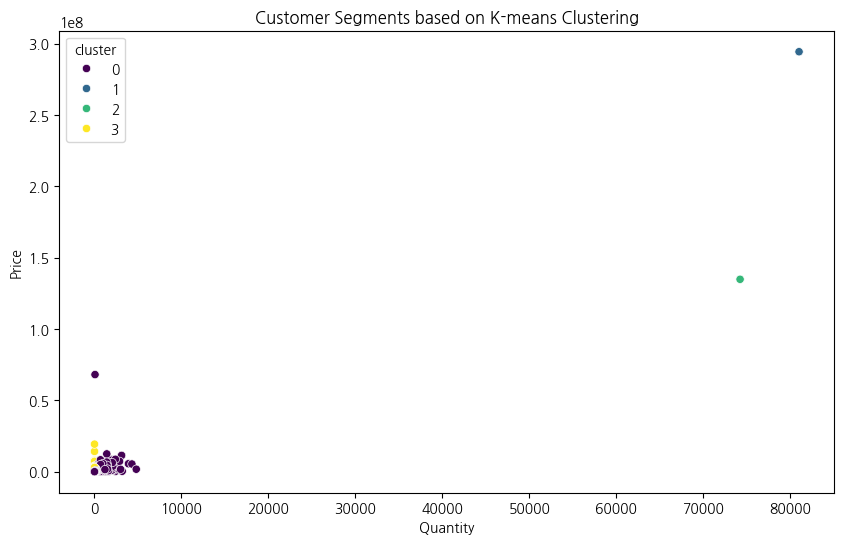

In [380]:
# 클러스터 결과 시각화 (예: Price와 Quantity를 사용한 2D 시각화)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', hue='cluster', data=need_df, palette='viridis')
title = 'Customer Segments based on K-means Clustering'
plt.title(title)

plt.savefig('./data/'+title+'.png')
plt.show()

In [414]:
# 이상치 버리기
drop_index = need_df[(need_df['Quantity']  >= 10000)].index.to_list()
t_df = need_df.drop(index=drop_index)


In [415]:
t_df

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month,day,cluster
42481,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1,4,0
42482,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4,0
42483,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4,0
42484,13313,2011-01-04 10:00:00,United Kingdom,5,2.10,18354.0,1,4,0
42485,13313,2011-01-04 10:00:00,United Kingdom,10,1.25,21850.0,1,4,0
...,...,...,...,...,...,...,...,...,...
541904,12680,2011-12-09 12:50:00,France,12,0.85,17829.6,12,9,0
541905,12680,2011-12-09 12:50:00,France,6,2.10,22024.8,12,9,0
541906,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9,0
541907,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9,0


In [416]:
# 사용할 변수 선택
features = t_df[['Quantity', 'UnitPrice', 'Price']]

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

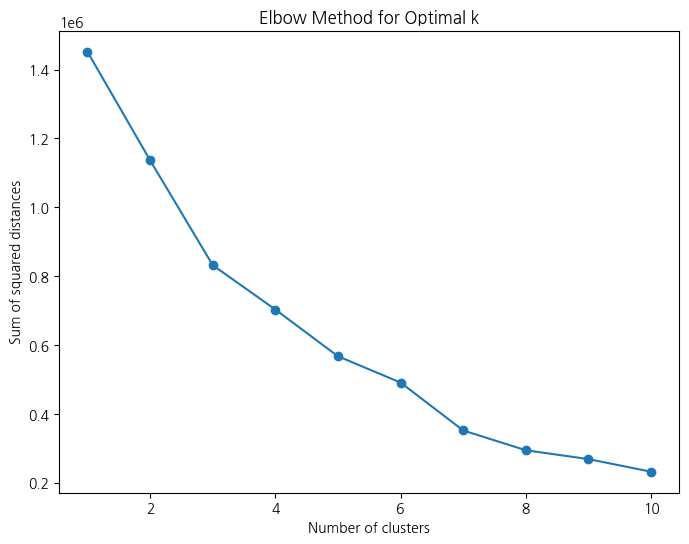

In [417]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [418]:
# K-means 군집화 수행
optimal_k = 4  # 엘보우 방법을 통해 선택한 최적의 k값
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
t_df['cluster'] = kmeans.fit_predict(scaled_features)

# 각 클러스터에 속한 데이터의 개수 확인
print(t_df['cluster'].value_counts())

cluster
0    479936
2      3716
3       197
1        36
Name: count, dtype: int64


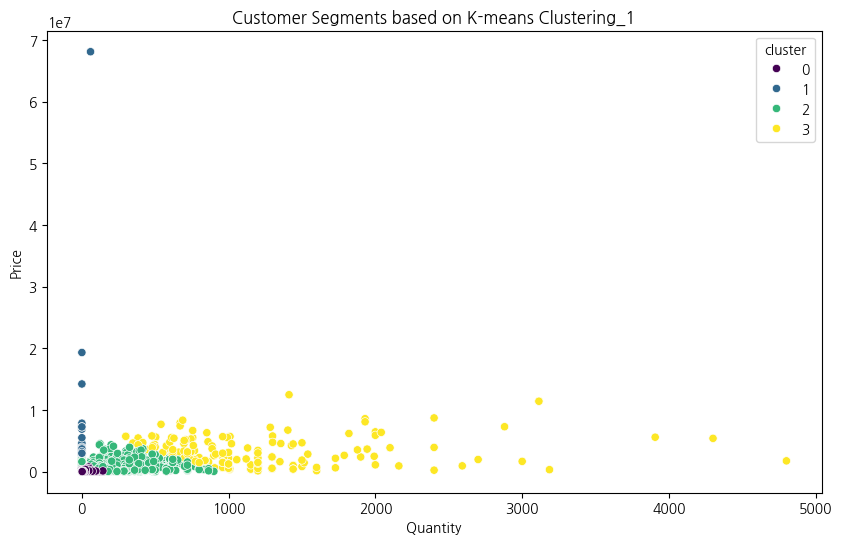

In [419]:
# 클러스터 결과 시각화 (예: Price와 Quantity를 사용한 2D 시각화)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', hue='cluster', data=t_df, palette='viridis')
title = 'Customer Segments based on K-means Clustering_1'
plt.title(title)

plt.savefig('./data/'+title+'.png')
plt.show()

In [432]:
# 아... 10..

# 조금더 데이터를 버려봅시다...
drop_index = t_df[(t_df['Quantity']  >= 2000)].index.to_list()
t_df = t_df.drop(index=drop_index)

drop_index_ = t_df[(t_df['Price'] >= 10000000)].index.tolist()
t_df = t_df.drop(index=drop_index_)

drop_index = t_df[t_df['Quantity'] <= 0].index.tolist()
t_df = t_df.drop(index=drop_index)

drop_index_ = t_df[t_df['Price'] <= 0].index.tolist()
t_df = t_df.drop(index=drop_index_)

In [433]:
t_df

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,Price,month,day,cluster
42481,13313,2011-01-04 10:00:00,United Kingdom,10,1.95,34086.0,1,4,0
42482,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4,0
42483,13313,2011-01-04 10:00:00,United Kingdom,25,0.42,18354.0,1,4,0
42484,13313,2011-01-04 10:00:00,United Kingdom,5,2.10,18354.0,1,4,0
42485,13313,2011-01-04 10:00:00,United Kingdom,10,1.25,21850.0,1,4,0
...,...,...,...,...,...,...,...,...,...
541904,12680,2011-12-09 12:50:00,France,12,0.85,17829.6,12,9,0
541905,12680,2011-12-09 12:50:00,France,6,2.10,22024.8,12,9,0
541906,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9,0
541907,12680,2011-12-09 12:50:00,France,4,4.15,29016.8,12,9,0


In [434]:
# 사용할 변수 선택
features = t_df[['Quantity', 'UnitPrice', 'Price']]

# 데이터 정규화 (스케일링)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

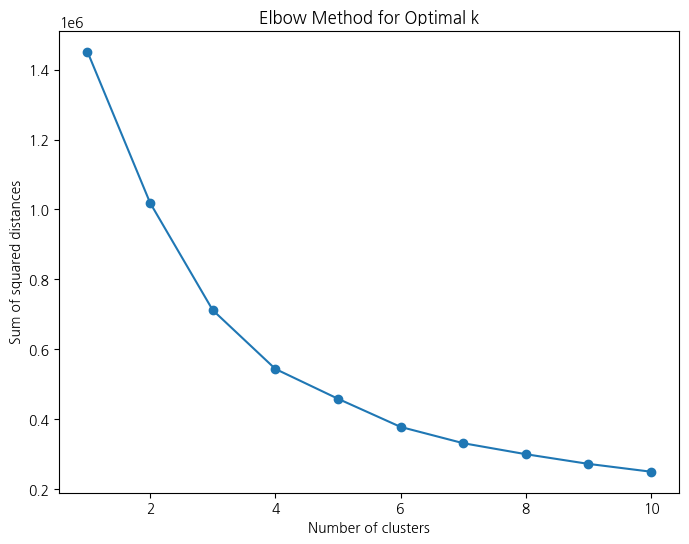

In [435]:
# 엘보우 방법을 사용하여 최적의 클러스터 수 찾기
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [440]:
# K-means 군집화 수행
optimal_k = 4  # 엘보우 방법을 통해 선택한 최적의 k값
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
t_df['cluster'] = kmeans.fit_predict(scaled_features)

# 각 클러스터에 속한 데이터의 개수 확인
print(t_df['cluster'].value_counts())

cluster
0    473470
1      9778
3       562
2        51
Name: count, dtype: int64


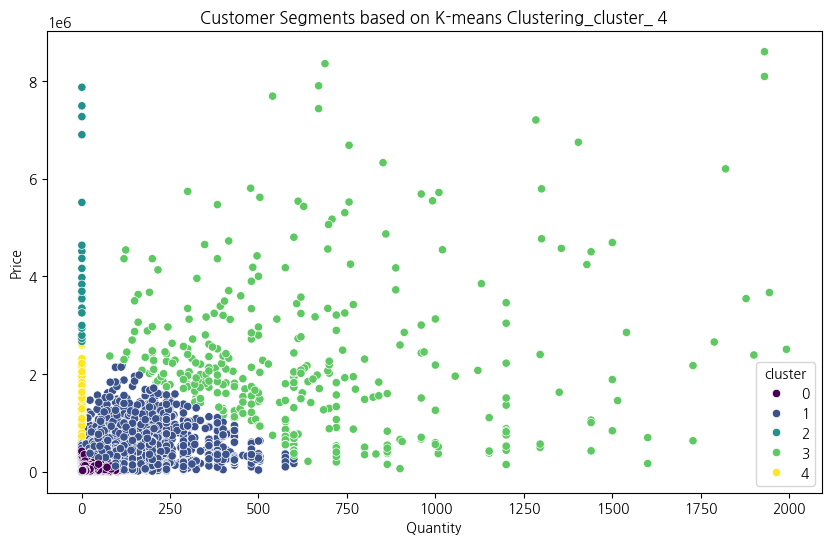

In [446]:
# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', hue='cluster', data=t_df, palette='viridis')
title = 'Customer Segments based on K-means Clustering_cluster_ 4'
plt.title(title)

plt.savefig('./data/'+title+'.png')
plt.show()

In [442]:
# K-means 군집화 수행
optimal_k = 5  # 엘보우 방법을 통해 선택한 최적의 k값
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
t_df['cluster'] = kmeans.fit_predict(scaled_features)

# 각 클러스터에 속한 데이터의 개수 확인
print(t_df['cluster'].value_counts())

cluster
0    473623
1      9521
3       562
4       124
2        31
Name: count, dtype: int64


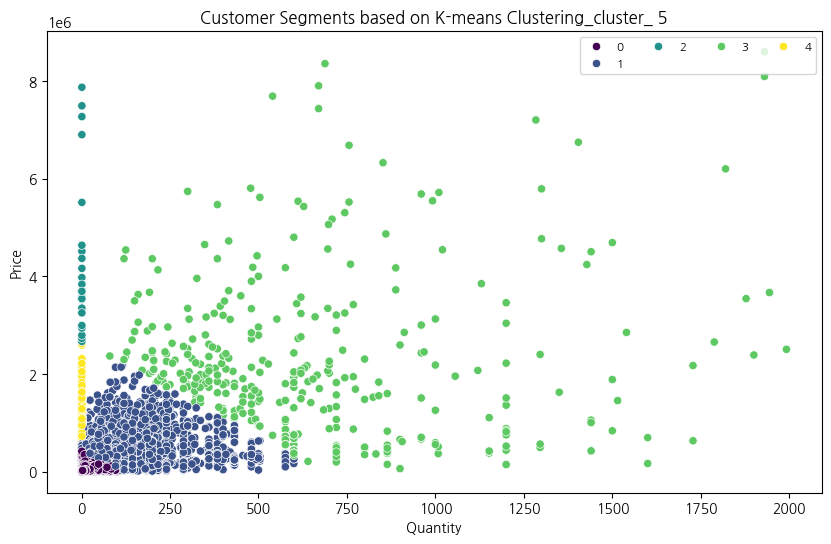

In [443]:
# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', hue='cluster', data=t_df, palette='viridis')
title = 'Customer Segments based on K-means Clustering_cluster_ 5'
plt.title(title)
plt.legend(loc='upper right', ncol=4, fontsize='small')

plt.savefig('./data/'+title+'.png')
plt.show()